# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [101]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [102]:
# Your code here

def alpha_func(df, idx):
   cov_ = np.cov(df[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False) # https://numpy.org/doc/stable/reference/generated/numpy.cov.html
   # Covariance indicates the level to which two variables vary together. 
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [103]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [121]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))



0.6675354865158227

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

# Answer

(iii)
There are only 150 samples, the observations are not sufficient to calculate the mean of Sepal.Length.
Bootstrapping can be particularly helpful for small sample sizes where traditional methods may not be reliable. By resampling, we can generate more data points to better understand the sampling variability.


In [122]:
# Add your code here to set the seed
bootstrap_values = []

def boot_SE(df, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    # first_, second_ = 0, 0
    n = df.shape[0]
    for i in range(B):
        idx = rng.choice(df.index,
                         n,
                         replace=True)
        value = alpha_func(df, idx)
        bootstrap_values.append(value)
        
    return np.std(np.array(bootstrap_values))

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

## Answer

(v)
The variance of the alpha is 0.03180510076860766

In [123]:
# Your code here

alpha_SE = boot_SE(df,
                   B=1000,
                   seed=0)
alpha_SE

0.03180510076860766

_(vi)_ What is the original mean value of `Sepal.Length`?

# Answer

(vi)
The original mean value of Sepal.Length is 5.843333333333334.

In [107]:
# Your code here

df.loc[:, 'Sepal.Length'].mean()


5.843333333333334

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

# Answer

(vii)
The bootstrapped mean is: 5.842284666666666, whereas the orginal mean is 5.843333333333334. The two means are very close. The difference is around 0.1% at 0.001048666666667586.
The standard deviation of the bootstrapped samples is: 0.06649295592099295.

In [108]:
# Add your code here

# Step 1: Create a DataFrame
data= df.loc[:, 'Sepal.Length']
df_samples=pd.DataFrame(data)


df_samples.loc[:,'Sepal.Length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [83]:
# Step 2: Define the number of bootstrap samples and sample size

B = 1000  # Number of bootstrap samples
n = len(df_samples)  # Size of each sample, also n = df_samples.shape[0]



In [109]:
# Step 3: Define the function to generate the bootstrapped samples

def boot_se_samples(df_samples, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    bootstrap_values_samples = []  # Define within function to avoid global scope
    n = df_samples.shape[0]
    
    for i in range(B):
        idx = rng.choice(df_samples.index, n, replace=True)
        value = alpha_func_samples(df_samples, idx)
        bootstrap_values_samples.append(value)
        
    return np.array(bootstrap_values_samples)
  
# Example usage of boot_SE function

# Define alpha_func_samples
def alpha_func_samples(df, idx):
    # Example alpha_func implementation: mean of a specific column
    return df_samples.loc[idx, 'Sepal.Length'].mean()

In [111]:
se_samples = boot_se_samples(df_samples)
print(se_samples)

[5.90933333 5.86866667 5.81133333 5.90933333 5.82533333 5.91866667
 5.80466667 5.728      5.88333333 5.942      5.776      5.82066667
 5.878      5.76133333 5.88733333 5.994      5.858      5.76866667
 5.964      5.88133333 5.878      5.84933333 5.80333333 5.958
 5.806      5.794      5.774      5.76666667 5.86066667 5.772
 5.83466667 5.89       5.82466667 5.882      5.89533333 5.71866667
 5.75466667 5.806      5.98933333 5.81666667 5.81133333 5.77666667
 5.79066667 5.81466667 5.878      5.76733333 5.904      5.826
 5.82666667 5.866      5.76866667 5.78066667 6.016      5.92933333
 5.978      5.80266667 5.78533333 5.814      5.776      5.824
 5.92733333 5.908      5.72333333 5.94933333 5.924      5.74066667
 5.836      5.87733333 5.86333333 5.81       5.966      5.78866667
 5.93533333 5.81666667 5.76066667 5.84666667 5.85333333 5.82
 5.87866667 5.858      5.79466667 5.95       5.81666667 5.832
 5.848      5.82466667 5.84666667 5.76066667 5.87133333 5.79333333
 5.81       5.816      5.8

In [117]:
# print mean of the bootstrapped mean of Sepal.Length values

mean = np.mean(boot_se_samples(df_samples))
print(f"Bootstrapped Mean: {mean}")

Bootstrapped Mean: 5.842284666666666


In [113]:
# print standard deviation of the bootstrapped mean of Sepal.Length values

se = np.std(boot_se_samples(df_samples))
print(f"Bootstrapped Standard Error: {se}")

Bootstrapped Standard Error: 0.06649295592099295


In [114]:
# compare the original mean value with the mean of the bootstrapped mean of Sepal.Length
diff = df.loc[:, 'Sepal.Length'].mean() - mean

print (diff)

0.001048666666667586


In [118]:
t_range = np.ptp(boot_se_samples(df_samples))

t_range

0.3873333333333342

_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

# Answer

The 95% confidence interval for mean value of the iris sepal length is between 5.71861667 and 5.97471667.

In [119]:
# Add your code here

np.percentile(boot_se_samples(df_samples),[2.5, 97.5])



array([5.71861667, 5.97471667])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?
#### After clarification, exercise (ix) is to create an histogram of the bootstrapped samples mean, instead of the whole data points of the 1000 resampling of 150 data points.


# Answer
The histogram shows means of the 1000 times of resampling the mean value for 150 Sepal Length values in each data set.
Most of the datapoints falls into the 95% confidence interval for the bootstrapped mean, between 5.72 and 5.97. The most frequent mean values are in the highest range of the bell shaped histogram, whereas the less likly mean values are in the lower ends of the histogram. The most frequent mean is in the bucket close to 5.85, this is similar to what we have calculated for bootstrapped mean: 5.84.

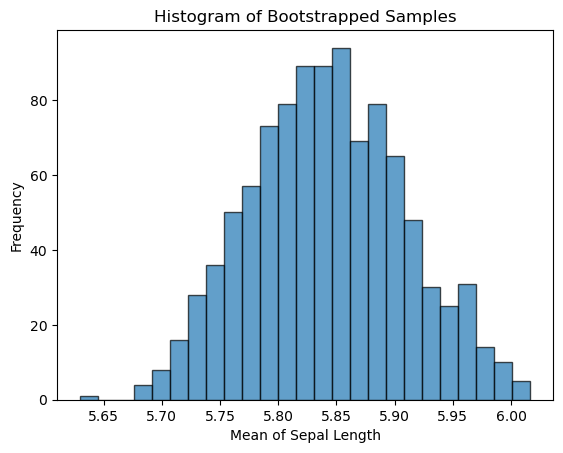

In [120]:
### After clarification, exercise (ix) is to create an histogram of the bootstrapped samples mean, instead of the whole data points of of the 1000 resampling of 150 data points.

# Create a figure and axis
fig, ax = plt.subplots()


# Create the histogram
#Add your code here
plt.hist(boot_se_samples(df_samples), bins=25, edgecolor='black', alpha=0.7)

# Add a title
#Add your code here
plt.title('Histogram of Bootstrapped Samples')

# Add a label to the x-axis
#Add your code here
plt.xlabel('Mean of Sepal Length')

# Add a label to the y-axis
#Add your code here
plt.ylabel('Frequency')
# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

# Write your answer here

We can inform the shipping company about the average of sepal length that 95% confidence interval of the bootstrapped mean for sepal length is between 5.72 and 5.97, meaning 95% of flowers' sepal length should fall into the range of 5.72 and 5.97.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
